In [1]:
import pandas as pd

# Load the user file
users_file_path = 'C:/Users/ekart/GLEB/14_Mar_2024_17_03_users_report.xlsx'
users_df = pd.read_excel(users_file_path)

# Display the first few rows of the dataframe to understand its structure
users_df.head()


,id,Имя,Страна,Регион,Населенный пункт,Facebook,Вконтакте,Дата регистрации,Группа,"Мето работы, учебы",...,"Количество WoS, Scopus публикаций",h-индекс РИНЦ,h-индекс Scopus,Перечень основных публикаций,Персональные качества и навыки,Знание языков,Знание специализированных программ,Файлы резюме,Метки,UTM
0,7040,Фирдавс,NaN,NaN,NaN,NaN,NaN,2024-03-08,Пользователь,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,7039,Максим,NaN,NaN,NaN,NaN,NaN,2024-03-05,Пользователь,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,7037,Максим,NaN,NaN,NaN,NaN,NaN,2024-03-05,Пользователь,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,7035,Эвелина,Россия,Пермский край,Краснокамск,NaN,NaN,2024-03-05,Пользователь,Крупное предприятие,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,7034,Арина,NaN,NaN,NaN,NaN,NaN,2024-03-05,Пользователь,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
# Identify columns that may be relevant based on the description
# Assuming "Персональные качества и навыки" and/or "Знание специализированных программ"
# might relate to interests and direction for the purpose of this analysis

# Filter users to those who have any of the potentially relevant fields filled
filtered_users_df = users_df.dropna(subset=["Персональные качества и навыки", "Знание специализированных программ"], how='all')

# Display the shape of the original and filtered dataframes to see how many records are left
original_count = users_df.shape[0]
filtered_count = filtered_users_df.shape[0]

(original_count, filtered_count, filtered_users_df[["Персональные качества и навыки", "Знание специализированных программ"]].head())


(5711,
 109,
                         Персональные качества и навыки  \
 44              Креативность. Пунктуальность. Эмпатия.   
 76                                       Ответственный   
 216  опыт курсового и дипломного проектирования, по...   
 373  увлечённость, собранность, целеустремлённость,...   
 577  Коммуникабельность, отзывчивость, стремление к...   
 
        Знание специализированных программ  
 44                                    NaN  
 76                                    Нет  
 216                    отличное знание ПК  
 373  Kompas3D, KiCad, Scilab, VSCode, ...  
 577                                   NaN  )

In [6]:
# Consolidate interests and skills into one column for simplicity
filtered_users_df['Interests_and_Skills'] = filtered_users_df[['Персональные качества и навыки', 'Знание специализированных программ']].apply(lambda x: ' '.join(x.dropna()), axis=1)

# Now, let's load the projects file
projects_file_path = 'C:/Users/ekart/GLEB/14_Mar_2024_20_10_project_report.xlsx'
# Load all sheets into a single dataframe
all_sheets_df = pd.concat(pd.read_excel(projects_file_path, sheet_name=None), ignore_index=True)

# Display the first few rows of the projects dataframe to understand its structure
all_sheets_df.head()


C:\Users\ekart\AppData\Local\Temp\ipykernel_7460\2306582391.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_users_df['Interests_and_Skills'] = filtered_users_df[['Персональные качества и навыки', 'Знание специализированных программ']].apply(lambda x: ' '.join(x.dropna()), axis=1)


,id,id мероприятия,Название,Направление,Статус проекта,Комментарий модератора,id польз.,Возможность редактирования,Роль в проекте,Unnamed: 9,...,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4.0,1.0,Cerebrum MD,Agro&MedTech,Акселерация,NaN,60.0,Заявитель,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5.0,2.0,ЦИФРОВОЙ КАБИНЕТ АДМИНИСТРАЦИИ УМНОГО ГОРОДА,Socio&EduTech,Акселерация,NaN,61.0,Заявитель,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,6.0,3.0,Разработка полифункциональной стабилизирующей ...,Chemical&GreenTech,Акселерация,NaN,62.0,Заявитель,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,7.0,4.0,Сортомат,Chemical&GreenTech,Экспертиза,NaN,63.0,Заявитель,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# Remove rows where all elements are NaN
clean_projects_df = all_sheets_df.dropna(how='all')

# Try to identify the column that likely contains the project descriptions
# This is based on a guess since the direct name isn't visible, we look for a column with long text entries
description_column = clean_projects_df.columns[clean_projects_df.applymap(lambda x: isinstance(x, str) and len(x) > 50).any()]

# Assuming the first such column is the description, display the name and first few entries of this column for verification
description_column_name = description_column[0] if len(description_column) > 0 else "Column not found"
sample_descriptions = clean_projects_df[description_column].head() if description_column_name != "Column not found" else "No descriptions found"

(description_column_name, sample_descriptions)


('Название',
                                             Название Специальность  \
 1                                        Cerebrum MD           NaN   
 2       ЦИФРОВОЙ КАБИНЕТ АДМИНИСТРАЦИИ УМНОГО ГОРОДА           NaN   
 3  Разработка полифункциональной стабилизирующей ...           NaN   
 4                                           Сортомат           NaN   
 5  Wooden Wool - древесная шерсть широкого назнач...           NaN   
 
   Университет Опыт и квалификация Достижения  \
 1         NaN                 NaN        NaN   
 2         NaN                 NaN        NaN   
 3         NaN                 NaN        NaN   
 4         NaN                 NaN        NaN   
 5         NaN                 NaN        NaN   
 
                             Краткое описание проекта  \
 1  "Cerebrum MD помогает медицинским организациям...   
 2  "Проект реализован как клиент-серверное прилож...   
 3  "Для удержания горячего битума на поверхности ...   
 4  Разрабатываемая нами технология

In [8]:
# Remove rows where all elements are NaN
clean_projects_df = all_sheets_df.dropna(how='all')

# Try to identify the column that likely contains the project descriptions
# This is based on a guess since the direct name isn't visible, we look for a column with long text entries
description_column = clean_projects_df.columns[clean_projects_df.applymap(lambda x: isinstance(x, str) and len(x) > 50).any()]

# Assuming the first such column is the description, display the name and first few entries of this column for verification
description_column_name = description_column[0] if len(description_column) > 0 else "Column not found"
sample_descriptions = clean_projects_df[description_column].head() if description_column_name != "Column not found" else "No descriptions found"

(description_column_name, sample_descriptions)


('Название',
                                             Название Специальность  \
 1                                        Cerebrum MD           NaN   
 2       ЦИФРОВОЙ КАБИНЕТ АДМИНИСТРАЦИИ УМНОГО ГОРОДА           NaN   
 3  Разработка полифункциональной стабилизирующей ...           NaN   
 4                                           Сортомат           NaN   
 5  Wooden Wool - древесная шерсть широкого назнач...           NaN   
 
   Университет Опыт и квалификация Достижения  \
 1         NaN                 NaN        NaN   
 2         NaN                 NaN        NaN   
 3         NaN                 NaN        NaN   
 4         NaN                 NaN        NaN   
 5         NaN                 NaN        NaN   
 
                             Краткое описание проекта  \
 1  "Cerebrum MD помогает медицинским организациям...   
 2  "Проект реализован как клиент-серверное прилож...   
 3  "Для удержания горячего битума на поверхности ...   
 4  Разрабатываемая нами технология

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Extract the consolidated interests and skills of users and project descriptions
user_interests_skills = filtered_users_df['Interests_and_Skills'].tolist()
project_descriptions = clean_projects_df['Краткое описание проекта'].dropna().tolist()

# Combine all texts to ensure vocabulary consistency across both sets
combined_texts = user_interests_skills + project_descriptions

# Initialize TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(combined_texts)

# Split the TF-IDF matrix back into users and projects
users_tfidf = tfidf_matrix[:len(user_interests_skills)]
projects_tfidf = tfidf_matrix[len(user_interests_skills):]

# Calculate cosine similarity between each user and each project
cosine_similarities = cosine_similarity(users_tfidf, projects_tfidf)

# For each project, find the top 5 matching users
top_matches = {}
for project_idx, project in enumerate(clean_projects_df['Краткое описание проекта'].dropna().index):
    project_name = clean_projects_df.iloc[project]['Название']
    top_user_indices = cosine_similarities[:, project_idx].argsort()[-5:][::-1]
    top_users = filtered_users_df.iloc[top_user_indices][['id', 'Имя']].to_dict(orient='records')
    top_matches[project_name] = top_users

top_matches


{'ЦИФРОВОЙ КАБИНЕТ АДМИНИСТРАЦИИ УМНОГО ГОРОДА': [{'id': 331,
   'Имя': 'Щеголев'},
  {'id': 344, 'Имя': 'Александр'},
  {'id': 3794, 'Имя': 'Вероника'},
  {'id': 2070, 'Имя': 'Далер'},
  {'id': 5614, 'Имя': 'Магомед'}],
 'Разработка полифункциональной стабилизирующей добавки для увеличения срока службы дорожных покрытий': [{'id': 54,
   'Имя': 'Владимир'},
  {'id': 461, 'Имя': 'Тугова'},
  {'id': 5347, 'Имя': 'София'},
  {'id': 5297, 'Имя': 'Адель'},
  {'id': 2710, 'Имя': 'Аким'}],
 'Сортомат': [{'id': 5263, 'Имя': 'Зумрат'},
  {'id': 6062, 'Имя': 'Евгений'},
  {'id': 6673, 'Имя': 'Полина'},
  {'id': 2677, 'Имя': 'Александр'},
  {'id': 461, 'Имя': 'Тугова'}],
 'Wooden Wool - древесная шерсть широкого назначения': [{'id': 5614,
   'Имя': 'Магомед'},
  {'id': 5347, 'Имя': 'София'},
  {'id': 5519, 'Имя': 'Денис'},
  {'id': 5672, 'Имя': 'Роман'},
  {'id': 461, 'Имя': 'Тугова'}],
 'Аппарат Dr. Mur': [{'id': 5614, 'Имя': 'Магомед'},
  {'id': 5347, 'Имя': 'София'},
  {'id': 5519, 'Имя': 'Ден

In [11]:
# Отобразим датафрейм с данными пользователей после фильтрации и консолидации интересов и навыков
display_df_users = filtered_users_df[['id', 'Имя', 'Interests_and_Skills']].copy()
display_df_users.rename(columns={'id': 'ID', 'Имя': 'Имя пользователя', 'Interests_and_Skills': 'Интересы и Навыки'}, inplace=True)

# Отобразим датафрейм с данными проектов, фокусируясь на названии и описании проекта
display_df_projects = clean_projects_df[['Название', 'Краткое описание проекта']].dropna().copy()
display_df_projects.rename(columns={'Название': 'Название проекта', 'Краткое описание проекта': 'Описание проекта'}, inplace=True)

display_df_users.head(), display_df_projects.head()


(       ID Имя пользователя                                  Интересы и Навыки
 44   6990            Ирина             Креативность. Пунктуальность. Эмпатия.
 76   6936            Алёна                                  Ответственный Нет
 216  6673           Полина  опыт курсового и дипломного проектирования, по...
 373  6398           Кирилл  увлечённость, собранность, целеустремлённость,...
 577  6076           Даниил  Коммуникабельность, отзывчивость, стремление к...,
                                     Название проекта  \
 1                                        Cerebrum MD   
 2       ЦИФРОВОЙ КАБИНЕТ АДМИНИСТРАЦИИ УМНОГО ГОРОДА   
 3  Разработка полифункциональной стабилизирующей ...   
 4                                           Сортомат   
 5  Wooden Wool - древесная шерсть широкого назнач...   
 
                                     Описание проекта  
 1  "Cerebrum MD помогает медицинским организациям...  
 2  "Проект реализован как клиент-серверное прилож...  
 3  "Для удер

In [14]:
def find_top_experts_for_project(project_name):
    """
    Функция для поиска топ-5 пользователей (экспертов) для заданного проекта.

    :param project_name: Название проекта.
    :return: Список из топ-5 пользователей для проекта.
    """
    # Проверяем, есть ли проект с таким названием
    if project_name not in top_matches:
        return "Проект с таким названием не найден. Пожалуйста, проверьте название и попробуйте снова."
    
    # Получаем топ-5 пользователей для проекта
    top_users_for_project = top_matches[project_name]
    
    # Формируем вывод
    top_users_info = []
    for user in top_users_for_project:
        user_info = f"ID: {user['id']}, Имя: {user['Имя']}"
        top_users_info.append(user_info)
    
    return top_users_info

# Пример использования функции (название проекта может быть изменено на актуальное из датафрейма)
example_project_name = "ЦИФРОВОЙ КАБИНЕТ АДМИНИСТРАЦИИ УМНОГО ГОРОДА"
find_top_experts_for_project(example_project_name)


['ID: 331, Имя: Щеголев',
 'ID: 344, Имя: Александр',
 'ID: 3794, Имя: Вероника',
 'ID: 2070, Имя: Далер',
 'ID: 5614, Имя: Магомед']

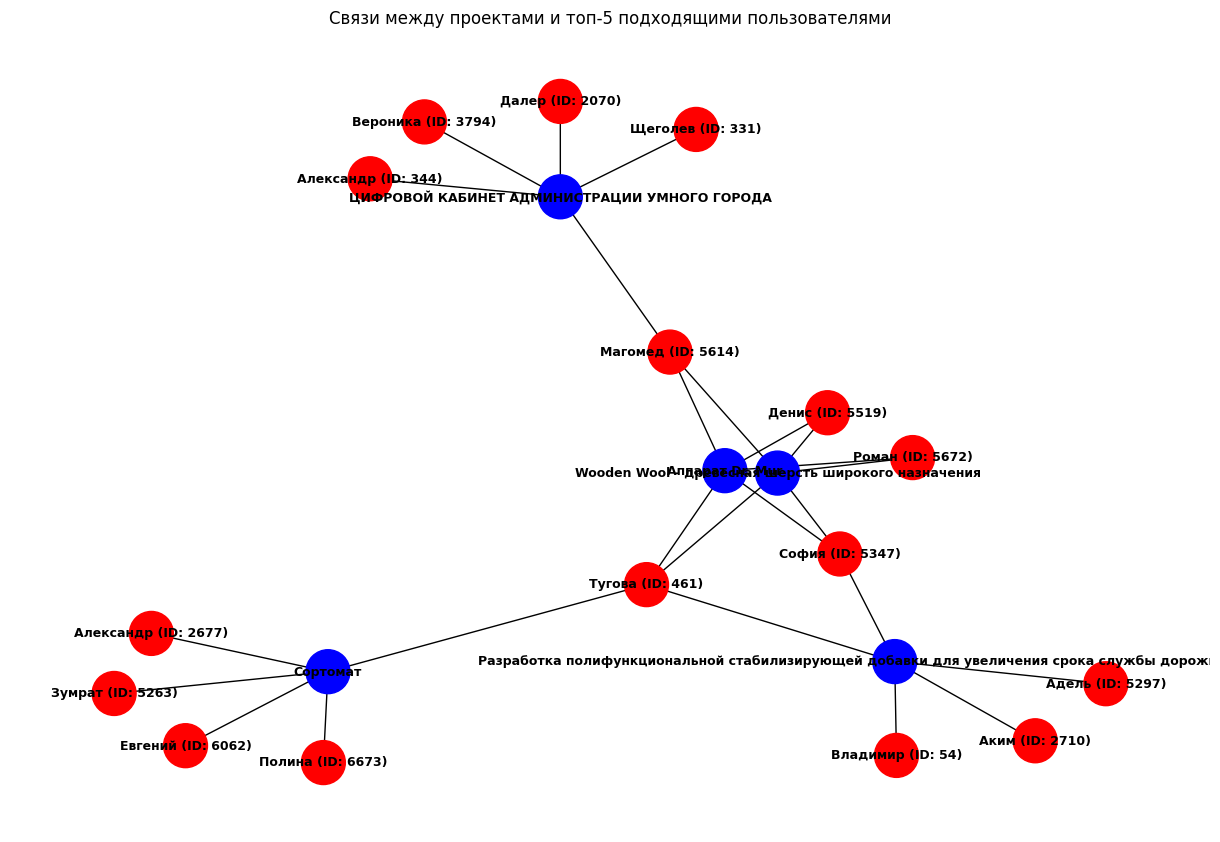

In [15]:
import networkx as nx
import matplotlib.pyplot as plt

# Создаем граф
G = nx.Graph()

# Выберем несколько проектов для визуализации
selected_projects = list(top_matches.keys())[:5]

# Добавляем узлы и ребра в граф
for project in selected_projects:
    G.add_node(project, type='project', color='blue')
    for user in top_matches[project]:
        user_name = f"{user['Имя']} (ID: {user['id']})"
        G.add_node(user_name, type='user', color='red')
        G.add_edge(project, user_name, weight=0.5)

# Устанавливаем цвет узла в зависимости от его типа
color_map = [G.nodes[node]['color'] for node in G]

# Рисуем граф
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, seed=42)  # Для стабильного расположения узлов
nx.draw(G, pos, with_labels=True, node_color=color_map, font_weight='bold', node_size=1000, font_size=9)
plt.title('Связи между проектами и топ-5 подходящими пользователями')
plt.show()
